In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from emnist import extract_training_samples, extract_test_samples

In [2]:
X_train, y_train = extract_training_samples('digits')
X_test, y_test = extract_test_samples('digits')

In [3]:
len(X_test)

40000

In [4]:
X_train[0].shape

(28, 28)

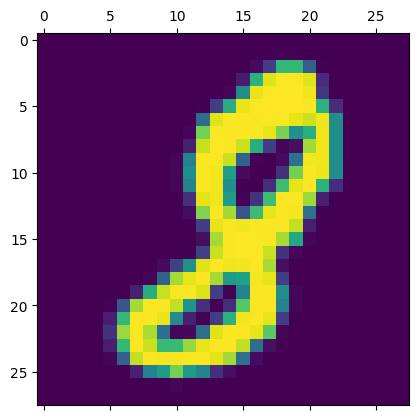

In [5]:
plt.matshow(X_train[0])

In [6]:
X_train.shape

(240000, 28, 28)

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [9]:
X_train_flattened.shape

(240000, 784)

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
7500/7500 [==============================] - 3s 425us/step - loss: 0.2925 - accuracy: 0.9232
Epoch 2/5
7500/7500 [==============================] - 3s 428us/step - loss: 0.2357 - accuracy: 0.9381
Epoch 3/5
7500/7500 [==============================] - 3s 423us/step - loss: 0.2288 - accuracy: 0.9401
Epoch 4/5
7500/7500 [==============================] - 3s 422us/step - loss: 0.2247 - accuracy: 0.9410
Epoch 5/5
7500/7500 [==============================] - 3s 425us/step - loss: 0.2223 - accuracy: 0.9416


In [11]:
model.evaluate(X_test_flattened, y_test)

1250/1250 [==============================] - 0s 334us/step - loss: 0.2211 - accuracy: 0.9406


[0.22108547389507294, 0.9405999779701233]

In [12]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

1250/1250 [==============================] - 0s 281us/step


array([9.1389829e-01, 1.8026081e-09, 1.1125614e-04, 1.0522069e-02,
       6.4369268e-04, 1.9769823e-02, 6.7219778e-04, 9.8100545e-06,
       9.0623952e-02, 5.4072412e-03], dtype=float32)

In [13]:
np.argmax(y_predicted[0])

0

In [14]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[0, 9, 7, 9, 2]

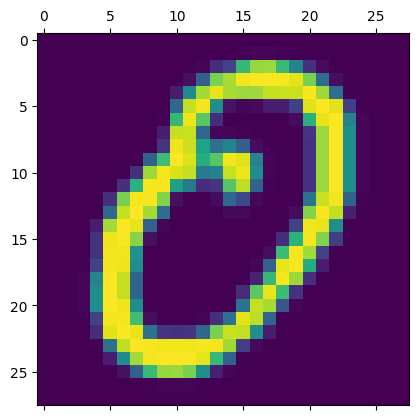

In [15]:
plt.matshow(X_test[0])

In [16]:
cm = tf.math.confusion_matrix(labels= y_test, predictions= y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[3875,    6,   16,    9,   34,   19,   18,    4,   15,    4],
       [   6, 3858,    7,   26,   18,   38,   11,    4,   27,    5],
       [  25,   25, 3730,   64,   30,   14,   28,   14,   67,    3],
       [  23,    3,   44, 3761,    3,   53,    0,   23,   61,   29],
       [  23,   17,   18,    1, 3714,    6,   47,    5,   47,  122],
       [  56,   10,   24,  156,   51, 3550,   42,    7,   85,   19],
       [  28,    9,   16,    2,   17,   12, 3898,    0,   18,    0],
       [   4,    4,    2,   17,   10,    1,    0, 3827,   13,  122],
       [  23,   26,   33,   79,   28,   68,   10,   13, 3686,   34],
       [  11,    7,    2,   49,   68,    9,    0,   95,   34, 3725]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

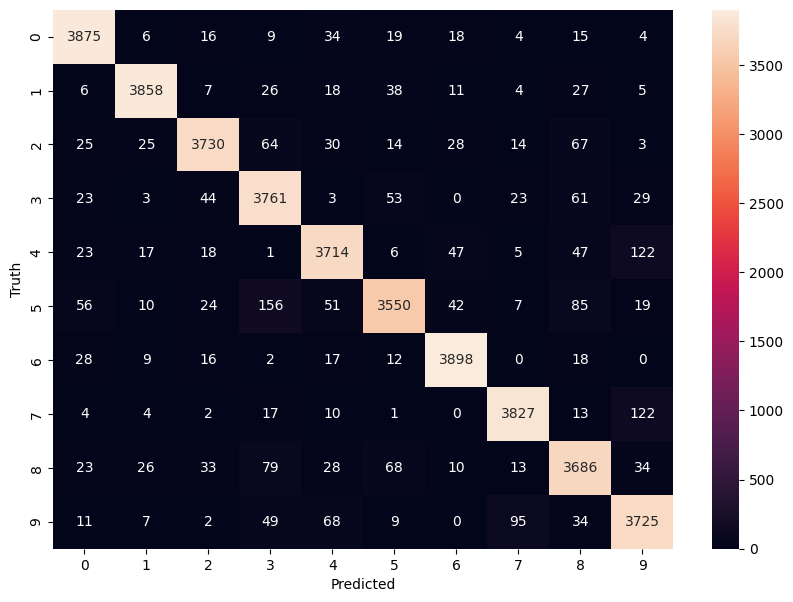

In [17]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [18]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [19]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
7500/7500 [==============================] - 5s 596us/step - loss: 0.1237 - accuracy: 0.9646
Epoch 2/5
7500/7500 [==============================] - 4s 593us/step - loss: 0.0569 - accuracy: 0.9833
Epoch 3/5
7500/7500 [==============================] - 4s 597us/step - loss: 0.0457 - accuracy: 0.9863
Epoch 4/5
7500/7500 [==============================] - 4s 596us/step - loss: 0.0387 - accuracy: 0.9883
Epoch 5/5
7500/7500 [==============================] - 5s 601us/step - loss: 0.0340 - accuracy: 0.9896


In [23]:
model.evaluate(X_test_flattened, y_test)

1250/1250 [==============================] - 1s 376us/step - loss: 0.0506 - accuracy: 0.9857


[0.050577178597450256, 0.9857000112533569]